Linear Regression Machine Learning Algorithm to Recognise Gestures

In [94]:
# Import relevant libraries to be used
# import pandas as pd : not relevant to a numpy only solution attempt
import numpy as np 
import matplotlib.pyplot as plt
import os

In [95]:
#Set Random Seed to our Pipeline to ensure reproducability
np.random.seed(13)

Data Preparation

Initially, I downloaded the dataset file and opened all the .rar files to take a cursory look at their structure. An initial analysis shows that all the folders are indexed according to user and day/repetitions. This is not that relevant for our purposes, and is only there for the purpose of good structure. The files in them however are named and indexed according to their gesture and repetition.  The index of the gesture will be somthing that we have to extract, as that will be our target feature for the ML model. The contatining data are space separate x,y,z readings from an accelerometer in a quasi time series format. All of these will be the basis of our ML Models training features.

In [96]:
#Reach data in nested directory
def get_file_paths(root_dir: str = '.') -> list:

    #root_dir = '.' # Root directory where files are located is our current folder

    file_paths = [] # Empty List to store all filepaths

    #Recursively get all files from current working directory
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if ('.txt' in file) and (not 'readme' in file.lower()) and (not len(file)<7): #Look for .txt files in the directories but exclude the Readme.txt file and parameter files, which is less than 7 character typically
                file_paths.append(os.path.join(root, file)) #Append filepaths to empty list

    print(len(file_paths))
    return file_paths

In [97]:
file_paths = get_file_paths()

4481


In [98]:
file_paths, len(file_paths)

(['./uWaveGestureLibrary/U1 (2)/A_Template_Acceleration1-9.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration2-10.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration1-8.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration3-8.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration3-9.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration7-9.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration7-8.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration5-8.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration5-9.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration8-3.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration2-8.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration2-9.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration8-2.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration8-10.txt',
  './uWaveGestureLibrary/U1 (2)/A_Template_Acceleration4-10.txt',
  './uWaveGestureLibra

In [99]:
def create_arrays_from_files(filepaths: list) -> list:
    
    gesture_arrays = [] #List to store numpy array from text files
    gesture_codes = [] #List to store the corresponding Gesture Code from path name

    for file_path in filepaths:
        ges_arr = np.loadtxt(file_path).reshape(1,-1) # Load the values in a text file, and flatten the values to get all the values to use in our features in a single row and multiple columns for each txt data
        gesture_code= file_path.split('_')[-1].split('-')[0][-1] # The gesture code is only mentioned in the filename with the schema index gesture-index repetition. Splice the path string to get gesture code, and put in array to use as feature column
        
        gesture_arrays.append(ges_arr)
        gesture_codes.append(int(gesture_code))

    return gesture_arrays, gesture_codes



In [100]:
ges_arrs, ges_codes = create_arrays_from_files(file_paths)

In [101]:
ges_arrs, len(ges_arrs)

([array([[-0.4615385 , -0.6153846 ,  0.08      , -0.4615385 , -0.6153846 ,
           0.08      , -0.4615385 , -0.6153846 ,  0.08      , -0.4615385 ,
          -0.6153846 ,  0.08      , -0.4615385 , -0.6153846 ,  0.08      ,
          -0.4615385 , -0.6153846 ,  0.08      , -0.4615385 , -0.6153846 ,
           0.08      , -0.4615385 , -0.6153846 ,  0.08      , -0.4615385 ,
          -0.6153846 ,  0.08      , -0.4615385 , -0.6153846 ,  0.08      ,
          -0.4615385 , -0.6153846 ,  0.08      , -0.4615385 , -0.6153846 ,
           0.08      , -0.4615385 , -0.5769231 ,  0.16      , -0.4615385 ,
          -0.5384616 ,  0.16      , -0.5       , -0.5384616 ,  0.16      ,
          -0.5384616 , -0.5769231 ,  0.16      , -0.5384616 , -0.5384616 ,
           0.12      , -0.5       , -0.5384616 ,  0.16      , -0.5384616 ,
          -0.5       ,  0.12      , -0.5384616 , -0.5       ,  0.16      ,
          -0.5384616 , -0.5       ,  0.16      , -0.5384616 , -0.5       ,
           0.16      , -0

In [102]:
ges_codes, len(ges_codes)

([1,
  2,
  1,
  3,
  3,
  7,
  7,
  5,
  5,
  8,
  2,
  2,
  8,
  8,
  4,
  8,
  6,
  8,
  4,
  4,
  8,
  8,
  6,
  6,
  8,
  6,
  4,
  2,
  4,
  6,
  8,
  6,
  4,
  2,
  3,
  2,
  4,
  6,
  8,
  1,
  6,
  4,
  2,
  2,
  6,
  4,
  2,
  2,
  4,
  6,
  3,
  5,
  7,
  7,
  5,
  3,
  5,
  1,
  1,
  3,
  5,
  7,
  7,
  5,
  1,
  1,
  3,
  5,
  7,
  5,
  3,
  1,
  1,
  3,
  5,
  7,
  7,
  7,
  3,
  1,
  5,
  7,
  1,
  3,
  1,
  7,
  5,
  5,
  7,
  1,
  3,
  3,
  1,
  7,
  5,
  7,
  1,
  3,
  3,
  1,
  7,
  5,
  3,
  5,
  7,
  1,
  3,
  3,
  1,
  5,
  2,
  7,
  8,
  6,
  4,
  4,
  6,
  8,
  2,
  6,
  4,
  4,
  6,
  2,
  2,
  6,
  4,
  4,
  2,
  2,
  6,
  5,
  4,
  6,
  2,
  8,
  2,
  8,
  8,
  2,
  8,
  6,
  6,
  8,
  8,
  2,
  4,
  4,
  8,
  3,
  3,
  1,
  6,
  1,
  5,
  8,
  4,
  5,
  7,
  7,
  2,
  4,
  6,
  4,
  2,
  5,
  2,
  4,
  6,
  6,
  2,
  2,
  4,
  8,
  6,
  6,
  8,
  4,
  2,
  2,
  4,
  6,
  6,
  4,
  7,
  7,
  5,
  3,
  1,
  1,
  3,
  7,
  5,
  3,
  3,
  1,
  1,
  3,
  5,
  7,


In [103]:
max_arr_length = max(len(arr) for arr in ges_arrs) #max fcn returns the maximum column number in our array

In [104]:
max_arr_length

1

In [105]:
max_arr_length = max(arr.shape[1] for arr in ges_arrs) #max fcn returns the maximum column number in our array

In [106]:
max_arr_length

945

In [107]:
def pad_with_0 (arrays: list) -> list | np.ndarray :

    max_length = max(array.shape[1] for array in arrays) #max fcn returns the maximum column number in our array

    #Add additional columns/values to our shorter inner arrays so we can make a numpy array without errors
    padded_arrays = [] # Empty List in which to append padded arrays
    for array in arrays:
        padded_array = np.pad(array, pad_width=((0,0),(0, max_length - array.shape[1])), mode='constant', constant_values= 0 ) # Theoretically I should be able to leave out contant_values argument and it would pad with value None aka 0 by default. Try it out later
        padded_arrays.append(padded_array)

    return padded_arrays



In [108]:
X_data = np.vstack(pad_with_0(ges_arrs))

In [109]:
X_data, X_data.ndim, X_data.size, X_data.shape

(array([[-0.4615385 , -0.6153846 ,  0.08      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.2307692 ,  0.03846154,  1.72      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.5       , -0.5384616 , -0.04      , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.1923077 ,  0.4615385 ,  1.48      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.8076923 , -0.07692308,  1.24      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.3846154 , -0.5384616 ,  0.2       , ...,  0.        ,
          0.        ,  0.        ]]),
 2,
 4234545,
 (4481, 945))

In [110]:
y_data = np.vstack(ges_codes)

In [111]:
y_data, y_data.size, y_data.ndim, y_data.shape

(array([[1],
        [2],
        [1],
        ...,
        [7],
        [3],
        [1]]),
 4481,
 2,
 (4481, 1))

In [112]:
def shuffle_X_y (X: np.ndarray, y: np.ndarray) -> np.ndarray :

    # Normalize dataset to reduce noise or bias and shuffle samples in rows to prevent user bias in ML Model
    # Shuffle Dataset
    # Combine dataset
    combined_dataset = np.hstack((X, y)) 

    # Create shuffled copy
    shuffled_dataset = np.random.permutation(combined_dataset) 
    
    rand_idx = np.random.permutation(np.arange(combined_dataset.shape[0]))

    # shuffled = combined_dataset[rand_idx]

    # Split into X and y
    X_shuffled = shuffled_dataset[:, :(shuffled_dataset.shape[1]-1)] # X
    y_shuffled = shuffled_dataset[:, -1].reshape(-1,1) # y

    return X_shuffled, y_shuffled



In [113]:
X_data_new, y_data_new = shuffle_X_y(X_data,y_data)

In [114]:
X_data_new, X_data_new.shape

(array([[ 0.07692308,  0.3461539 ,  1.92      , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.03846154,  0.3461539 ,  1.2       , ...,  0.        ,
          0.        ,  0.        ],
        [-0.7692308 , -0.2692308 , -0.12      , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.5769231 , -0.1153846 ,  0.96      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.1538462 ,  0.2692308 ,  1.92      , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.6153846 ,  0.1153846 ,  1.08      , ...,  0.        ,
          0.        ,  0.        ]]),
 (4481, 945))

In [115]:
y_data_new, y_data_new.shape

(array([[2.],
        [3.],
        [1.],
        ...,
        [3.],
        [5.],
        [4.]]),
 (4481, 1))

In [152]:
def normalize_std_mean (X_train: np.ndarray, X_test: np.ndarray ) -> np.ndarray:

    #Normalize Dataset
    mean = np.mean(X_train, axis = 0 )
    std = np.std(X_train, axis=0)

    X_train_norm = (X_train - mean) / (std + 1e-8)

    X_test_norm = (X_test - mean) / (std + 1e-8)

    return X_train_norm, X_test_norm



    

In [153]:
def robust_scaling(X_train: np.ndarray, X_test: np.ndarray) -> np.ndarray:

    #    Courtesy of Statistics script

    #IMP! Apply same 

    median = np.median(X_train, axis=0)

    q1 = np.percentile(X_train, 25, axis=0)
    q3 = np.percentile(X_train, 75, axis = 0)

    iqr = q3-q1

    X_train_scaled = (X_train - median ) / iqr
    X_test_scaled = (X_test - median ) / iqr

    return X_train_scaled, X_test_scaled




In [117]:
def one_hot_encoding(y: np.ndarray) -> np.ndarray:

    #One Hot Code y vector for our multi class classificaiton problem

    #Bring to Start Index 0
    y = y.astype(int)
    y_idxshift = y - 1 
    
    #Get the number of classes
     #num_classes = np.max(ges_codes_in_np)
    num_classes = np.max(y_idxshift) + 1 
    
    #print(num_classes)

    #Initialize empty numpy array to hold OHE Labels
    y_encoded = np.zeros((len(y_idxshift), num_classes))
    #Set to 1 for corresponding sample
    y_encoded[np.arange(len(y_idxshift)), y_idxshift.flatten()] = 1

    return y_encoded, y_idxshift
        

In [118]:
y_ohe, y_idx_shift = one_hot_encoding(y_data_new)

In [119]:
y_ohe, y_ohe.size, y_ohe.shape

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 35848,
 (4481, 8))

In [120]:
y_idx_shift, y_idx_shift.shape

(array([[1],
        [2],
        [0],
        ...,
        [2],
        [4],
        [3]]),
 (4481, 1))

In [349]:
#Use numpy to arrange data

ges_arrs = [] #List to store numpy array from text files
ges_codes = [] #List to store the corresponding Gesture Code from path name

for file_path in file_paths:
    ges_arr = np.loadtxt(file_path).reshape(1,-1) # Load the values in a text file, and flatten the values to get all the values to use in our features in a single row and multiple columns for each txt data
    gesture_code= file_path.split('_')[-1].split('-')[0][-1] # The gesture code is only mentioned in the filename with the schema index gesture-index repetition. Splice the path string to get gesture code, and put in array to use as feature column
    
    ges_arrs.append(ges_arr)
    ges_codes.append(int(gesture_code))

max_arr_length = max(arr.shape[1] for arr in ges_arrs) #max fcn returns the maximum column number in our array

#Add additional columns/values to our shorter inner arrays so we can make a numpy array without errors
ges_arrs_padded = [] # Empty List in which to append padded arrays
for arr in ges_arrs:
    ges_arr_padded = np.pad(arr, pad_width=((0,0),(0, max_arr_length - arr.shape[1])), mode='constant', constant_values= 0 ) # Theoretically I should be able to leave out contant_values argument and it would pad with value None aka 0 by default. Try it out later
    ges_arrs_padded.append(ges_arr_padded)

comb_ges_arr = np.vstack(ges_arrs_padded)

ges_codes_in_np = np.vstack(ges_codes)

if ges_codes_in_np.shape[0] == comb_ges_arr.shape[0]:
    print('Matrixes are conform')

# Normalize dataset to reduce noise or bias and shuffle samples in rows to prevent user bias in ML Model
# Shuffle Dataset
combined_dataset = np.hstack((comb_ges_arr, ges_codes_in_np)) # Combine dataset

shuffled_dataset = np.random.permutation(combined_dataset) # Create shuffled copy

# Split into X and y
comb_ges_arr = shuffled_dataset[:, :(shuffled_dataset.shape[1]-1)] # X
ges_codes_in_np = shuffled_dataset[:, -1].reshape(-1,1) # y

# Normalize Dataset
mean_ds = np.mean(comb_ges_arr, axis=0) # Mean along rows
std_ds = np.std(comb_ges_arr, axis = 0) # Standard Deviataion by row

X_normed = (comb_ges_arr - mean_ds) / (std_ds + 1e-8) # Normalized X


#One Hot Code y vector for our multi class classificaiton problem

#Bring to Start Index 0
y_shift = ges_codes_in_np - 1 
y_shift = y_shift.astype(int)

#Get the number of classes

#num_classes = np.max(ges_codes_in_np)
num_classes = np.max(y_shift) + 1 
print(num_classes)

#Initialize empty numpy array to hold OHE Labels
y_encoded = np.zeros((len(y_shift), num_classes))
#Set to 1 for corresponding sample
y_encoded[np.arange(len(y_shift)), y_shift.flatten()] = 1


Matrixes are conform
8


In [350]:
y_shift

array([[1],
       [2],
       [0],
       ...,
       [2],
       [4],
       [3]])

In [351]:
y_encoded


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [352]:
y_encoded.size

35848

Prepare for a Logistic Regression Algorithm application

Now since the datas are treated appropriately, under the assumption that the dataset itself is complete and true, it is time to set up the logisitc regreassion in numpy. 

The mathematics of linear regreassion is simple enough for classification problems. Firstly, 'load' our equation with each feature getting a random assigned weight. Add a constant value column to account for bias or intercept. With the closed form solution, we can get the weights and use it to identify gestures. It will be useful to separate a few hundred rows of sample data to use as validation for our trained model. I will also attempt to add in optimisation and regularisation techniques to bring the performance closer to library levels as I'm used to in sklearn. It is indeed a novel challenge, as I've never set up my own interpretation of the LogReg algorithm from scratch yet!

In [121]:
def train_test_split(X: np.ndarray, y_encoded: np.ndarray, y_indexed: np.ndarray) -> np.ndarray:

    #Make Training Data Set of sample size ratio 8:2
    # Cutoff index 8:2
    index_cutoff= int(np.round(X.shape[0] * 0.8)) 

    #Segregate Samples for Training 
    
    # Training Dataset Matrix X
    X_train = X[:index_cutoff,:] 
    # Training Dataset Matrix y
    y_train = y_encoded[:index_cutoff,:]

    #Add test here that y_train corresponds to y_encoded? that its the same index?
    #Or maybe test with idx back at shuffle to see shuffle is successful 
    # along rows and not columns

    #Make Validation Data Set of Sample Size of ratio 8:2

    # Shuffled validation sets
    X_valid = X[index_cutoff:,:] 
    y_valid_test = y_indexed[index_cutoff:,:] 
    y_valid_train = y_indexed[:index_cutoff,:]

    return X_train, y_train, X_valid, y_valid_test, y_valid_train
    

In [122]:
X_train, y_train, X_valid, y_valid_test, y_valid_train = train_test_split(X_data_new, y_ohe, y_idx_shift)

In [123]:
X_train, X_train.shape

(array([[ 0.07692308,  0.3461539 ,  1.92      , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.03846154,  0.3461539 ,  1.2       , ...,  0.        ,
          0.        ,  0.        ],
        [-0.7692308 , -0.2692308 , -0.12      , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.8461539 ,  0.1923077 ,  1.48      , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.4230769 ,  0.3076923 ,  0.56      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.4230769 ,  0.6538461 , -0.8       , ...,  0.        ,
          0.        ,  0.        ]]),
 (3585, 945))

In [124]:
y_train, y_train.shape

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 (3585, 8))

In [125]:
X_valid, X_valid.shape

(array([[-1.192308  ,  0.8461539 ,  1.56      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.3076923 ,  0.07692308,  0.76      , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.1153846 , -0.6538461 ,  0.24      , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.5769231 , -0.1153846 ,  0.96      , ...,  0.        ,
          0.        ,  0.        ],
        [-0.1538462 ,  0.2692308 ,  1.92      , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.6153846 ,  0.1153846 ,  1.08      , ...,  0.        ,
          0.        ,  0.        ]]),
 (896, 945))

In [126]:
y_valid_test, y_valid_test.shape

(array([[2],
        [0],
        [5],
        [6],
        [6],
        [1],
        [4],
        [7],
        [3],
        [2],
        [5],
        [0],
        [7],
        [2],
        [3],
        [4],
        [6],
        [6],
        [0],
        [5],
        [2],
        [4],
        [5],
        [1],
        [6],
        [1],
        [1],
        [7],
        [7],
        [3],
        [0],
        [2],
        [1],
        [4],
        [7],
        [1],
        [3],
        [1],
        [2],
        [7],
        [5],
        [1],
        [5],
        [3],
        [1],
        [4],
        [4],
        [5],
        [1],
        [6],
        [2],
        [4],
        [1],
        [6],
        [0],
        [1],
        [7],
        [4],
        [1],
        [6],
        [0],
        [2],
        [0],
        [5],
        [2],
        [2],
        [6],
        [4],
        [7],
        [5],
        [0],
        [3],
        [5],
        [0],
        [4],
        [7],
        [1],

In [127]:
y_valid_train, y_valid_train.shape

(array([[1],
        [2],
        [0],
        ...,
        [7],
        [3],
        [5]]),
 (3585, 1))

In [353]:
#Make Training Data Set of sample size ratio 8:2
index_cutoff= int(np.round(comb_ges_arr.shape[0] * 0.8)) # Cutoff index 8:2

#Segregate Samples for Training 

X_train = comb_ges_arr[:index_cutoff,:] # Suffled Dataset X
y_train = y_encoded[:index_cutoff,:] # Shuffled Dataset y

#Add test here that y_train corresponds to y_encoded? that its the same index?

# Shuffled and Normalized Dataset; y_train is unchanged
X_train_0_norm = X_normed[:index_cutoff,:]


#Add a column of constant value, in this case 1, for line intercept considerations
#X_train = np.hstack( ((np.ones((X_train_0.shape[0], 1), dtype=int) ), X_train_0))

#Make Validation Data Set of Sample Size of ratio 8:2

# Shuffled validation sets
X_valid = comb_ges_arr[index_cutoff:,:] 
y_valid_test = y_shift[index_cutoff:,:] 
y_valid_train = y_shift[index_cutoff:,:]

#Shuffled and normalized set
X_valid_norm = X_normed[index_cutoff:,:]

#Add a column of constant value, in this case 1, for line intercept considerations
#X_valid = np.hstack( ((np.ones((X_valid_0.shape[0], 1), dtype=int) ), X_valid_0))

#Set up weights for matrix
#np.random.seed(13)
#weights = np.random.randn(X_train_0.shape[1]).reshape(-1,1)

#if X_train_0.shape[1] == weights.shape[0]:
#    print('Matrixes can be multiplied')

In [354]:
(np.std(X_valid_norm))

1.1440702071425792

Setup a Logistic Regression Algorithm

In [128]:
# Define a extended sigmoid function for multi classification purposes
# Taken from ML Script for TU Darmstadt and Springer Text Book on Numerical Analysis

def sigmoid_softmax(input: np.ndarray) -> np.ndarray:
    '''The Softmax function is an extension of the Sigmoid function.
    It is commonly used in logistic regressions and expands itself from
    binary classification to be able to classify multiple classes.
    In multi-class classification algorithms, it take a vector of 
    scores and transfroms them into a probabiliy distribution over multiple classes.
    The function calculates the predicted class as one with the highest probabilit 
    according to output.
    
    Input: score of real value
    Output: probability distribution over multiple classes'''

    exp_input = np.exp(input - np.max(input, axis=1, keepdims=True)) # Return Maximum along Column

    score = exp_input / np.sum(exp_input, axis=1, keepdims=True)

    return score


In [144]:
# Define the loss function
# Taken from Springer Text Book on Numerical Analysis

def cross_entropy (y_predicted: np.ndarray, y_true: np.ndarray) -> np.ndarray:
    '''The Cross Entropy Loss fucntion is used in logistic regression for multi classification problems.
    It measures the deviance between predicted probabilites and true labels
    
    The goal of our regression will be to minimize the loss represented by this function.
    This will help to classify input sampled to its correct classes'''

    loss = -np.mean(np.sum(y_true * np.log(y_predicted + 1e-8), axis = 1))

    return loss

In [188]:
# Setup Gradient Descent Algorithm to update and calculate weights
# Taken from documentation in sklearn library

def gradient_descent (X: np.ndarray , y: np.ndarray, learning_rate: float = 0.1, iter: int = 1000, print_loss: bool = False ) -> np.ndarray :
    '''Implement gradient descent algorithm to initialize and update weights for our model'''
    
    # Empty list for Epoch
    epoch = []
    # Empty list fpr accuracy
    losses = []

    # Get Sample, Feature and Class numbers
    num_samples, num_features = X.shape
    num_classes = y.shape[1]
    
    #Initialize Parameters
    weight = np.random.randn(num_features,num_classes)

    # Setup Iteration to update weights
    for i in range(iter):
        scores = np.dot(X, weight) # Dot product of arrays
        # alterntely use @?
        probabiliy_dist = sigmoid_softmax(scores)
        gradient = np.dot(X.T, probabiliy_dist - y) / num_samples
        
        weight = weight - learning_rate*gradient
        
        
        
        # Print progress
        if print_loss and (i+1)%100 == 0:
            loss = cross_entropy(probabiliy_dist, y)
            
            epoch.append(i+1)
            losses.append(loss)
            print(f'Iteration {i+1}, Loss: {loss}')
            

    return weight, epoch, losses
    
        



In [189]:
# Setup prediction function
# Self implemented from context

def predict(X: np.ndarray, weight: np.ndarray) -> np.ndarray:

    '''Take X and learned weight from gradient descent to give a prediction on y'''
    scores = np.dot(X,weight)
    probability_dist = sigmoid_softmax(scores)
    predicted_class = np.argmax(probability_dist, axis=1)
    predicted_class = predicted_class.reshape(-1,1)
    
    # Return indices from probability
    return predicted_class



In [190]:
# Setup accuracy function
# Self implemented from context

def accuracy(y_predicted: np.ndarray, y: np.ndarray) -> np.ndarray | float:
    '''Calculate accurarcy of our predictions against true values'''

    acc_pred = (y_predicted == y)
    acc_pred_mean = np.mean(acc_pred)

    print(f'Accuracy is {acc_pred_mean}')

    return acc_pred, acc_pred_mean



In [191]:
def confusion_matrix_plot(y_true: np.ndarray, y_predicted: np.ndarray) -> None:
    '''Courtesy of Nihal Barua, Thanks for showing me what a confusion matrix is'''
    
    all_classes = np.unique(np.concatenate((y_true,y_predicted)))
    num_classes = len(all_classes)

    confusion_matrix = np.zeros((num_classes, num_classes), dtype = int)

    for i in range(num_classes):
        for j in range (num_classes):
            confusion_matrix[i,j] = np.sum((y_true == i) & (y_predicted == j)
                                           )
            
        
        plt.figure(figsize=(10, 10))
        plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
        plt.colorbar()
        plt.xticks(np.arange(num_classes), range(num_classes))
        plt.yticks(np.arange(num_classes), range(num_classes))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()
    

In [199]:
def loss_plot(epochs: list, accuracy: list ) -> None:
    plt.plot(epochs, accuracy)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Accuracy')
    plt.show()

In [200]:
def model (X_train: np.ndarray, y_train: np.ndarray, X_valid: np.ndarray, y_valid_test: np.ndarray, y_valid_train: np.ndarray, iter: int =1000, learning_rate: float=0.1,print_loss: bool =False) -> None:

    #Gradient descent to retrieve trained parameters
    weight, model_epochs, model_losses = gradient_descent(X_train, y_train, learning_rate, iter, print_loss)

    #Predict
    y_predicted_train = predict(X_train, weight)
    y_predicted_test = predict(X_valid, weight)

    #Accuracy Inspection
    acc_train_compare, acc_train_mean = accuracy(y_predicted_train, y_valid_train)
    acc_valid_compare, acc_valid_mean = accuracy(y_predicted_test, y_valid_test)

    print(f'The prediction accuracy of the training dataset is {acc_train_mean*100}%')
    print('The comparision array is as follows:')
    print(acc_train_compare)

    print(f'The prediction accuracy of the training dataset is {acc_valid_mean*100}%')
    print('The comparision array is as follows:')
    print(acc_valid_compare)

    #Plot Visualisations

    #Plot Loss Function

    loss_plot(model_epochs, model_losses)

    confusion_matrix_plot(y_valid_test, y_predicted_test)



    
    

In [201]:
# Set hyperparameters in a dictionary
hyperparameters = {
    'Learning Rate' : 0.1,
    'Number of Iterations': 5000
}


Iteration 100, Loss: 2.2601121558819672
Iteration 200, Loss: 1.4289115037408027
Iteration 300, Loss: 1.1527879010387494
Iteration 400, Loss: 1.0122792644155443
Iteration 500, Loss: 0.9196735065557683
Iteration 600, Loss: 0.8540693611939397
Iteration 700, Loss: 0.8053103281103404
Iteration 800, Loss: 0.7674081983519523
Iteration 900, Loss: 0.7367702718036548
Iteration 1000, Loss: 0.71121217864766
Accuracy is 0.8217573221757322
Accuracy is 0.8191964285714286
The prediction accuracy of the training dataset is 82.17573221757321%
The comparision array is as follows:
[[ True]
 [False]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
The prediction accuracy of the training dataset is 81.91964285714286%
The comparision array is as follows:
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ T

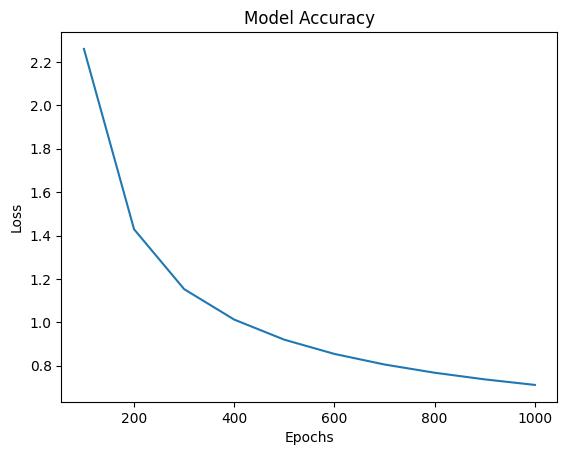

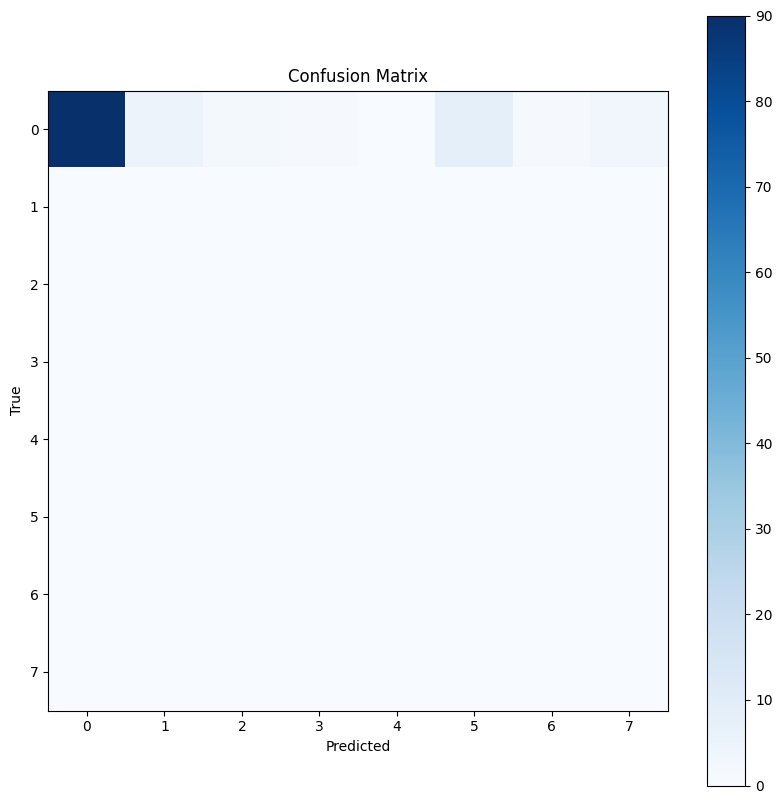

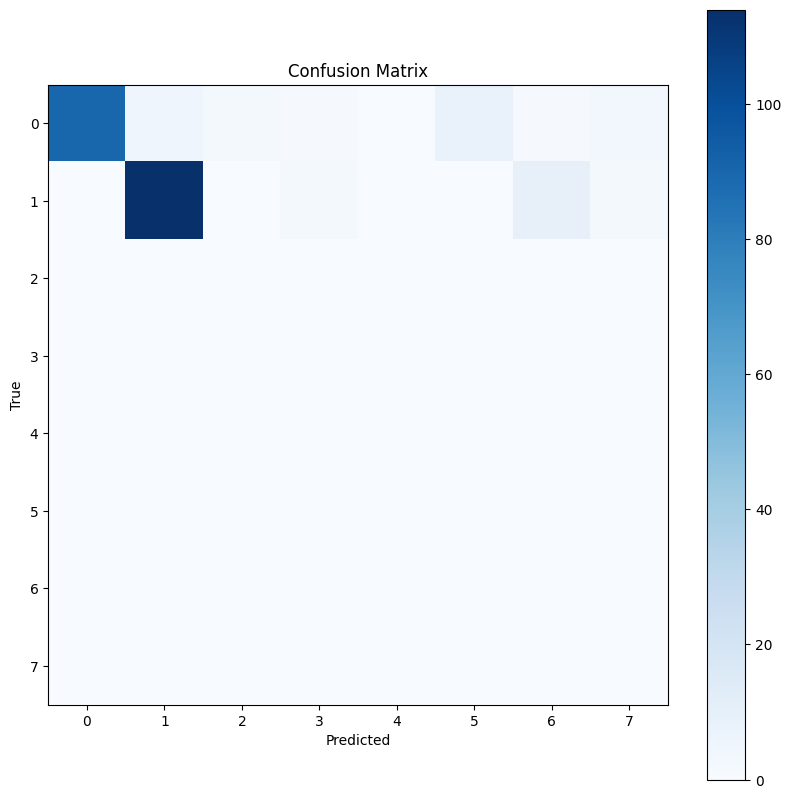

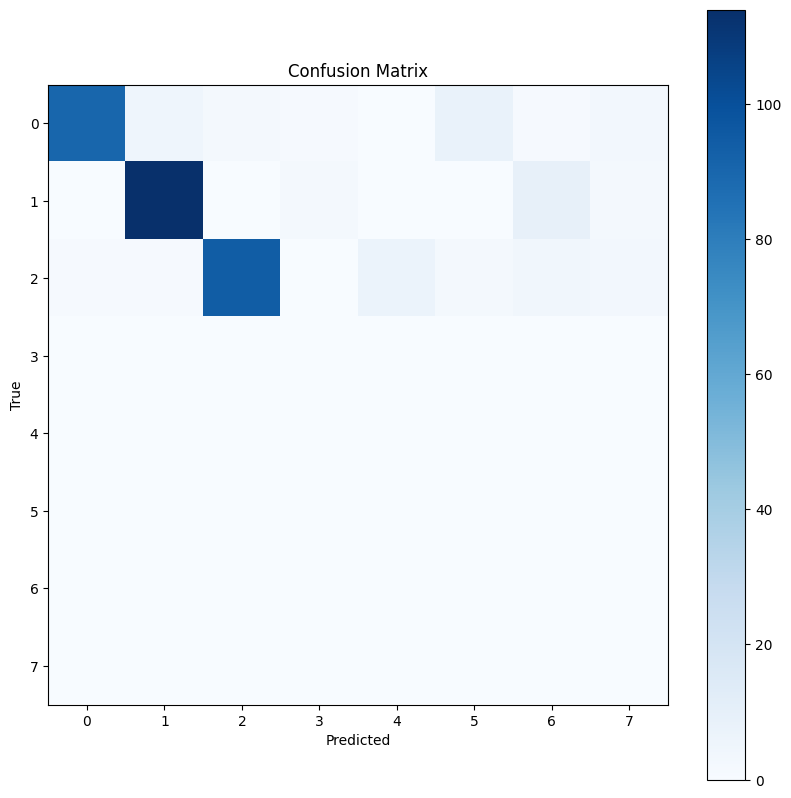

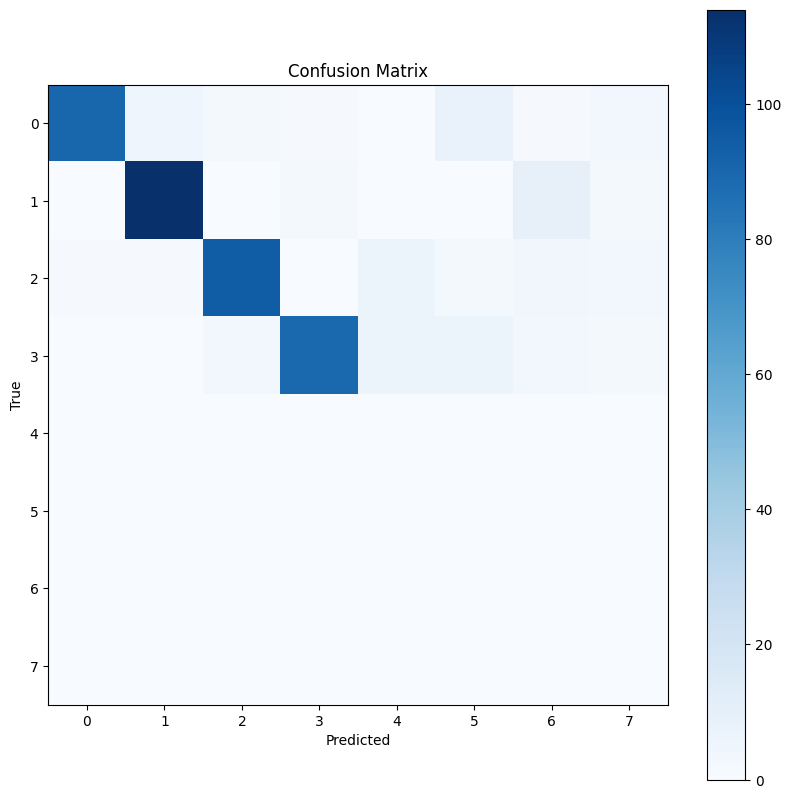

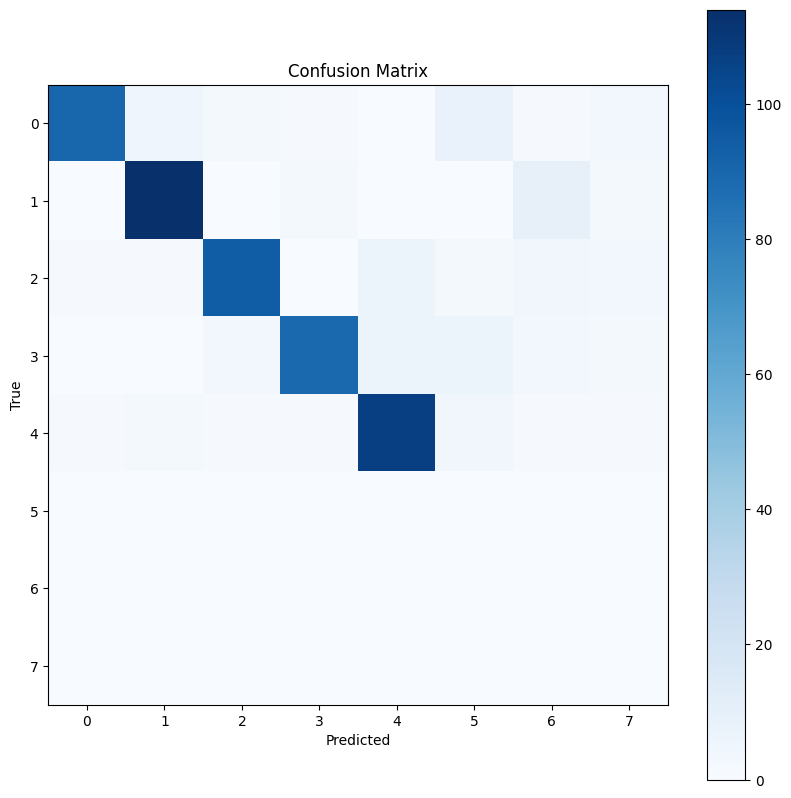

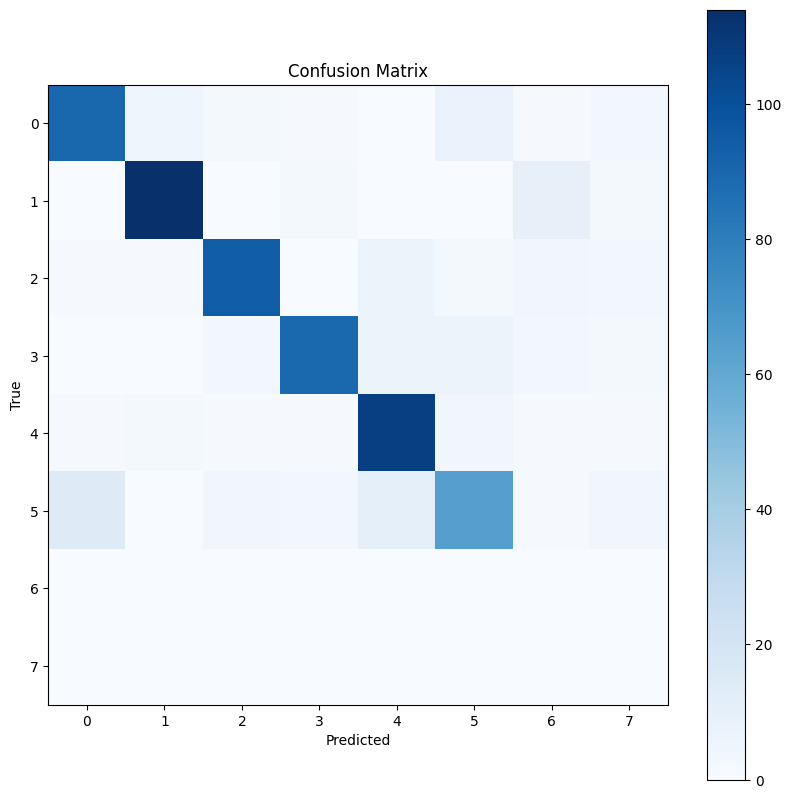

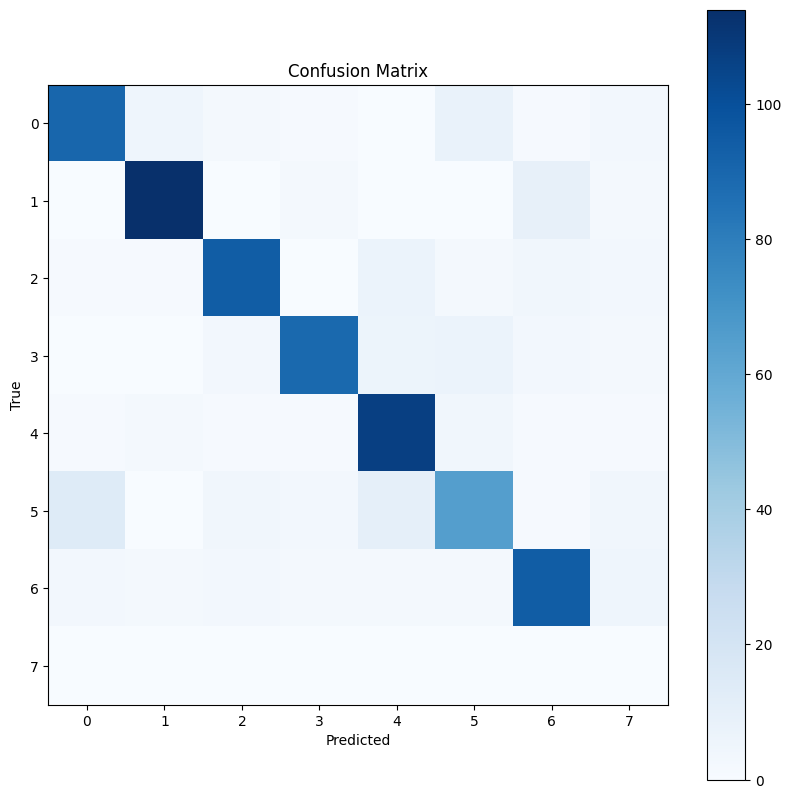

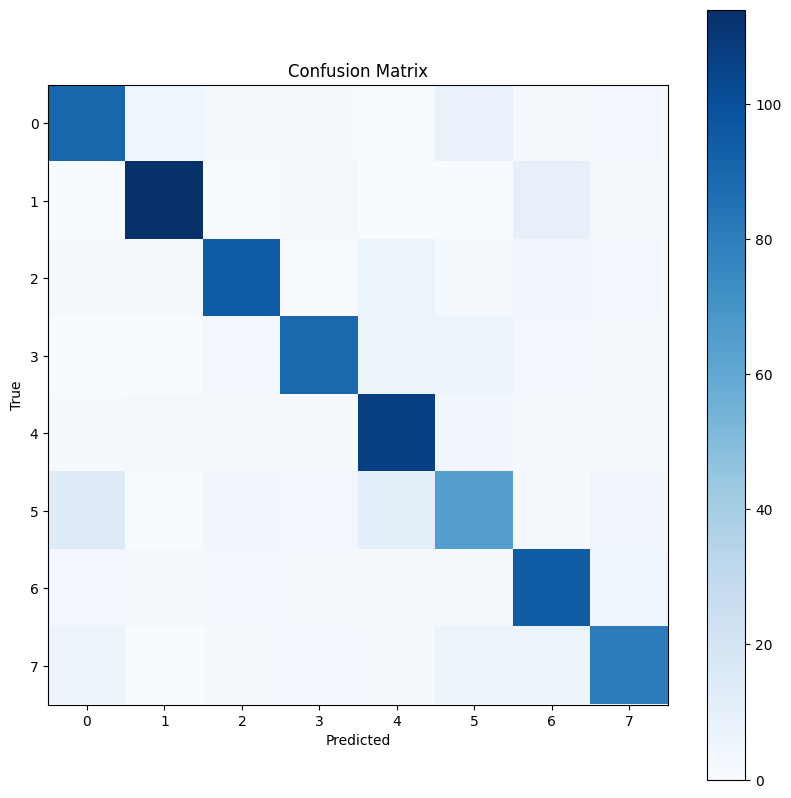

In [202]:
model(X_train,y_train,X_valid,y_valid_test,y_valid_train,print_loss=True)

In [136]:
weight = gradient_descent(X_train, y_train, hyperparameters['Learning Rate'], hyperparameters['Number of Iterations'], print_loss = True)

Iteration 100, Loss: 2.4709186409191735
Iteration 200, Loss: 1.5582469818304892
Iteration 300, Loss: 1.2473324766265241
Iteration 400, Loss: 1.0870965405950797
Iteration 500, Loss: 0.9848273624913816
Iteration 600, Loss: 0.9127747206940722
Iteration 700, Loss: 0.8581819321865284
Iteration 800, Loss: 0.8149222506092046
Iteration 900, Loss: 0.7794945284734743
Iteration 1000, Loss: 0.7496855953594932
Iteration 1100, Loss: 0.724061916647391
Iteration 1200, Loss: 0.7016890741492164
Iteration 1300, Loss: 0.6819409981260901
Iteration 1400, Loss: 0.6643462903419121
Iteration 1500, Loss: 0.6485279690166451
Iteration 1600, Loss: 0.6341974066819419
Iteration 1700, Loss: 0.6211328499334832
Iteration 1800, Loss: 0.6091575259616294
Iteration 1900, Loss: 0.5981251906116578
Iteration 2000, Loss: 0.5879123862633738
Iteration 2100, Loss: 0.578416602383596
Iteration 2200, Loss: 0.5695537500268185
Iteration 2300, Loss: 0.5612542519719855
Iteration 2400, Loss: 0.5534596887888186
Iteration 2500, Loss: 0.546

In [137]:
y_predicted = predict(X_valid, weight)


In [138]:
y_valid_test.shape

(896, 1)

In [139]:
y_valid_test

array([[2],
       [0],
       [5],
       [6],
       [6],
       [1],
       [4],
       [7],
       [3],
       [2],
       [5],
       [0],
       [7],
       [2],
       [3],
       [4],
       [6],
       [6],
       [0],
       [5],
       [2],
       [4],
       [5],
       [1],
       [6],
       [1],
       [1],
       [7],
       [7],
       [3],
       [0],
       [2],
       [1],
       [4],
       [7],
       [1],
       [3],
       [1],
       [2],
       [7],
       [5],
       [1],
       [5],
       [3],
       [1],
       [4],
       [4],
       [5],
       [1],
       [6],
       [2],
       [4],
       [1],
       [6],
       [0],
       [1],
       [7],
       [4],
       [1],
       [6],
       [0],
       [2],
       [0],
       [5],
       [2],
       [2],
       [6],
       [4],
       [7],
       [5],
       [0],
       [3],
       [5],
       [0],
       [4],
       [7],
       [1],
       [2],
       [5],
       [2],
       [5],
       [5],
       [6],
    

In [140]:
y_predicted = y_predicted.reshape(-1,1)

In [141]:
y_predicted

array([[2],
       [5],
       [5],
       [6],
       [6],
       [1],
       [4],
       [7],
       [3],
       [2],
       [0],
       [0],
       [7],
       [2],
       [3],
       [4],
       [6],
       [5],
       [0],
       [5],
       [2],
       [4],
       [5],
       [1],
       [6],
       [1],
       [1],
       [7],
       [7],
       [4],
       [0],
       [2],
       [1],
       [4],
       [7],
       [1],
       [5],
       [1],
       [4],
       [7],
       [5],
       [1],
       [5],
       [7],
       [1],
       [4],
       [4],
       [5],
       [1],
       [6],
       [2],
       [4],
       [1],
       [6],
       [0],
       [1],
       [7],
       [4],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [4],
       [2],
       [6],
       [4],
       [7],
       [3],
       [0],
       [3],
       [5],
       [2],
       [4],
       [7],
       [1],
       [2],
       [5],
       [2],
       [4],
       [0],
       [6],
    

In [142]:
a,b= accuracy(y_predicted, y_valid_test)

Accuracy is 0.8470982142857143


In [143]:
def min_max_scaling (X):
    

array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [93]:
weight = gradient_descent(normalize(X_train), y_train, hyperparameters['Learning Rate'], hyperparameters['Number of Iterations'], print_loss=True)

/var/folders/hx/_vhn75s151v9qstj7s56hyj80000gn/T/ipykernel_90877/934175838.py:11: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(np.sum(y_true * np.log(y_predicted), axis = 1))
/var/folders/hx/_vhn75s151v9qstj7s56hyj80000gn/T/ipykernel_90877/934175838.py:11: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(np.sum(y_true * np.log(y_predicted), axis = 1))


Iteration 100, Loss: nan
Iteration 200, Loss: nan
Iteration 300, Loss: nan
Iteration 400, Loss: nan
Iteration 500, Loss: nan
Iteration 600, Loss: nan
Iteration 700, Loss: nan
Iteration 800, Loss: nan
Iteration 900, Loss: nan
Iteration 1000, Loss: nan
Iteration 1100, Loss: nan
Iteration 1200, Loss: nan
Iteration 1300, Loss: nan
Iteration 1400, Loss: nan
Iteration 1500, Loss: nan
Iteration 1600, Loss: nan
Iteration 1700, Loss: nan
Iteration 1800, Loss: nan
Iteration 1900, Loss: nan
Iteration 2000, Loss: nan
Iteration 2100, Loss: nan
Iteration 2200, Loss: nan
Iteration 2300, Loss: nan
Iteration 2400, Loss: nan
Iteration 2500, Loss: nan
Iteration 2600, Loss: nan
Iteration 2700, Loss: nan
Iteration 2800, Loss: nan
Iteration 2900, Loss: nan
Iteration 3000, Loss: nan
Iteration 3100, Loss: nan
Iteration 3200, Loss: nan
Iteration 3300, Loss: nan
Iteration 3400, Loss: nan
Iteration 3500, Loss: nan
Iteration 3600, Loss: nan
Iteration 3700, Loss: nan
Iteration 3800, Loss: nan
Iteration 3900, Loss:

In [ ]:
y_predicted = predict(X_valid_0, weight)

In [ ]:
accuracy(y_predicted, y_valid)

Accuracy is 0.1286347058354592


(array([[False, False, False, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False, False,  True]]),
 0.1286347058354592)

In [ ]:
# Setup learning parameters
learn_rate = 0.009
iter = 10
a = 0.015

# Define a Loss Function
def loss_mse(y_1,y_2):
    loss_mse = np.mean((y_1-y_2)**2)
    return loss_mse

After a bit of consideration, i decided to look up sources in some kaggle notebooks and consult friends and stackexchange to see how I can add a regularization algorithm to regulate my weights, and tell the algorithm if it is doing a good job or not. Without it, I keep getting fractionals and negative values, which is normal, as I can still abs and int the values to get interpretable values. But I still want to go upto higher learning rates and iterations and get a solid prediction basis without doing such modificaitons.

The regularization method I chose is L2 ridge, as that was the easiest to implement at first glance. In future, it is worth testing the individual regulators to see the subtleties of how they perform

In [ ]:
#Implement gradient descent to update weight
loss_perepoch = [] # Empty list to append loss values

# Recursion to implement best fit regression
for i in range(iter):
    
    #Calculate predicted outputs with current version of weights
    y_pred = X_train @  weights
    print(y_pred)
    
    #Calculate gradients
    nabla = ((2/int(X_train.shape[0])) * ( X_train.T @ (y_pred - y_train)) )
    L2 = 2 * a * weights # Regulator term
    
    #Update weight
    weights = weights - learn_rate*(nabla+L2)

    #Loss function
    loss = loss_mse(y_pred,y_train)
    loss_perepoch.append(loss)

    if loss < 0.2:
        break

loss_epoch = np.array(loss)




NameError: name 'X_train' is not defined

In [ ]:
#Validate the result of our final weights
y_model = X_valid @ weights

#Loss in Validation Data
#loss_valid = loss_mse(y_model, y_valid)

# Compare our predictions to our validation data
y_model = abs(np.ndarray.round(y_model))
comparison = y_model == y_valid
perc_pred = (np.sum(comparison) / comparison.size) * 100 
print(f'{perc_pred}%')
#Display visualisations to gain insight


10.397553516819572%


In [ ]:
y_model

array([[ 4.],
       [ 4.],
       [ 6.],
       [ 9.],
       [ 7.],
       [15.],
       [10.],
       [14.],
       [ 9.],
       [ 9.],
       [12.],
       [ 7.],
       [ 8.],
       [13.],
       [ 7.],
       [10.],
       [ 3.],
       [ 5.],
       [13.],
       [ 3.],
       [ 5.],
       [ 1.],
       [23.],
       [ 3.],
       [ 7.],
       [ 3.],
       [ 4.],
       [ 9.],
       [ 5.],
       [15.],
       [18.],
       [ 4.],
       [ 9.],
       [ 3.],
       [ 5.],
       [10.],
       [ 5.],
       [12.],
       [ 2.],
       [ 0.],
       [17.],
       [ 2.],
       [13.],
       [ 5.],
       [10.],
       [ 4.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 7.],
       [ 5.],
       [ 1.],
       [ 6.],
       [ 2.],
       [ 3.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 4.],
       [ 5.],
       [ 7.],
       [ 1.],
       [ 1.],
       [ 3.],
       [ 7.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 5.],
       [ 0.],
       [ 5.],
      